# Exercise: Decision Tree

**Gunakan dataset Employee.csv**

**Info mengenai dataset dapat dilihat pada link berikut:** <https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction>

- Target = LeaveOrNot
- Lakukan modeling dengan Decision Tree
- Pilih max_depth terbaik (model paling general)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('Employee.csv')
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
df.duplicated().sum()

1889

In [6]:
df.drop_duplicates(inplace=True)

EDA

In [7]:
Y = df['LeaveOrNot'].copy()
Y.head()


0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [8]:
X = df.drop(columns=['LeaveOrNot'])
X.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  
0                          0  
1                          3  
2                          2  
3                          5  
4                          2

In [9]:
X['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [10]:
X['Education']=X['Education'].map({'Bachelors':1, 'Masters':2, 'PHD':3})
X.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0          1         2017  Bangalore            3   34    Male          No   
1          1         2013       Pune            1   28  Female          No   
2          1         2014  New Delhi            3   38  Female          No   
3          2         2016  Bangalore            3   27    Male          No   
4          2         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  
0                          0  
1                          3  
2                          2  
3                          5  
4                          2

In [11]:
X=pd.get_dummies(X,drop_first=True, dtype=int)
X.head()

Education  JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
0          1         2017            3   34                          0   
1          1         2013            1   28                          3   
2          1         2014            3   38                          2   
3          2         2016            3   27                          5   
4          2         2017            3   24                          2   

   City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  
0               0          0            1                0  
1               0          1            0                0  
2               1          0            0                0  
3               0          0            1                0  
4               0          1            1                1

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
display(X_train, X_test, Y_train, Y_test)

Education  JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
38            1         2017            2   29                          2   
2790          1         2013            3   30                          5   
2388          1         2015            2   29                          1   
3074          1         2015            2   34                          5   
3352          1         2017            3   37                          2   
...         ...          ...          ...  ...                        ...   
4226          2         2015            2   26                          4   
4201          2         2013            2   29                          1   
4275          2         2013            2   32                          2   
1643          1         2013            3   28                          1   
2761          1         2018            3   29                          1   

      City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  
38                 0          1            0                0  
2790               0          0            0                0  
2388               0          1            0                1  
3074               0          1            0                0  
3352               0          1            0                0  
...              ...        ...          ...              ...  
4226               0          1            0                0  
4201               0          0            1                0  
4275               1          0            1                1  
1643               0          0            1                1  
2761               0          0            1                1  

[2211 rows x 9 columns]

Education  JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
3279          1         2017            3   34                          3   
3941          1         2015            3   34                          2   
2996          3         2012            3   37                          5   
377           1         2017            3   27                          5   
1064          1         2014            3   27                          5   
...         ...          ...          ...  ...                        ...   
4329          1         2014            3   22                          0   
1069          3         2015            1   25                          3   
3630          1         2013            3   32                          5   
839           1         2012            3   24                          2   
875           2         2014            3   25                          3   

      City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  
3279               0          0            1                0  
3941               0          0            1                0  
2996               1          0            0                0  
377                0          0            1                1  
1064               0          0            0                1  
...              ...        ...          ...              ...  
4329               0          0            0                0  
1069               0          1            0                0  
3630               0          0            1                0  
839                0          1            1                0  
875                1          0            1                0  

[553 rows x 9 columns]

38      1
2790    0
2388    1
3074    1
3352    0
       ..
4226    1
4201    1
4275    1
1643    0
2761    1
Name: LeaveOrNot, Length: 2211, dtype: int64

3279    0
3941    1
2996    0
377     0
1064    1
       ..
4329    1
1069    1
3630    1
839     0
875     0
Name: LeaveOrNot, Length: 553, dtype: int64

    Max Depth  Accuracy_train  Accuracy_test
0           1        0.685663       0.703436
1           2        0.709181       0.683544
2           3        0.746721       0.717902
3           4        0.763003       0.719711
4           5        0.788331       0.768535
5           6        0.802352       0.792043
6           7        0.816825       0.786618
7           8        0.832203       0.801085
8           9        0.846676       0.781193
9          10        0.862506       0.750452
10         11        0.872004       0.743219
11         12        0.885572       0.741410
12         13        0.898688       0.712477
13         14        0.909995       0.710669


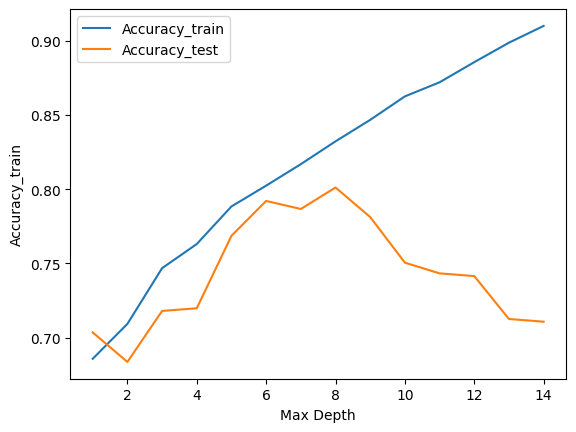

In [13]:
df_acc = pd.DataFrame(columns=['Max Depth', 'Accuracy_train','Accuracy_test'])
for i in range(1,15):
    model = DecisionTreeClassifier(random_state=0, max_depth=i).fit(X_train,Y_train)
    Y_train_predict = model.predict(X_train)    
    Y_test_predict = model.predict(X_test)
    df_acc.loc[len(df_acc)] = {'Max Depth': i, 'Accuracy_train': accuracy_score(Y_train, Y_train_predict), 'Accuracy_test': accuracy_score(Y_test, Y_test_predict)}

print(df_acc)
sns.lineplot(data=df_acc, x='Max Depth', y='Accuracy_train', label='Accuracy_train')
sns.lineplot(data=df_acc, x='Max Depth', y='Accuracy_test', label='Accuracy_test')
plt.show()

Chosing Max Depth =6, karena accuracy test (79%) dan selisih dengan accuracy train (80%) paling rendah.

In [14]:
df_acc = pd.DataFrame(columns=['Max Depth', 'Accuracy_train','Accuracy_test'])
model = DecisionTreeClassifier(random_state=0, max_depth=6).fit(X_train,Y_train)
Y_train_predict = model.predict(X_train)    
Y_test_predict = model.predict(X_test)
df_acc.loc[len(df_acc)] = {'Max Depth': 6, 'Accuracy_train': accuracy_score(Y_train, Y_train_predict), 'Accuracy_test': accuracy_score(Y_test, Y_test_predict)}
df_acc

Max Depth  Accuracy_train  Accuracy_test
0          6        0.802352       0.792043

In [15]:
# plot_tree(decision_tree=model, feature_names= list(X.columns), class_names=['Not Leave','Leave'])
plt.figure(figsize=(200,200))
plot_tree(decision_tree=model, class_names=['Not Leave','Leave'])
plt.show()